In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ocddetection.data import SENSORS

In [2]:
def read_meta(path):
    df = pd.read_csv(path, index_col=0)
    df.index = pd.TimedeltaIndex(df.index).rename('ms')
    
    return df

In [3]:
meta = [
    [
        read_meta(f'./data/including_original_activity/S{subject}-ADL{run}-META.csv')
        for run in range(1, 6)
    ]
    for subject in range(1, 5)
]

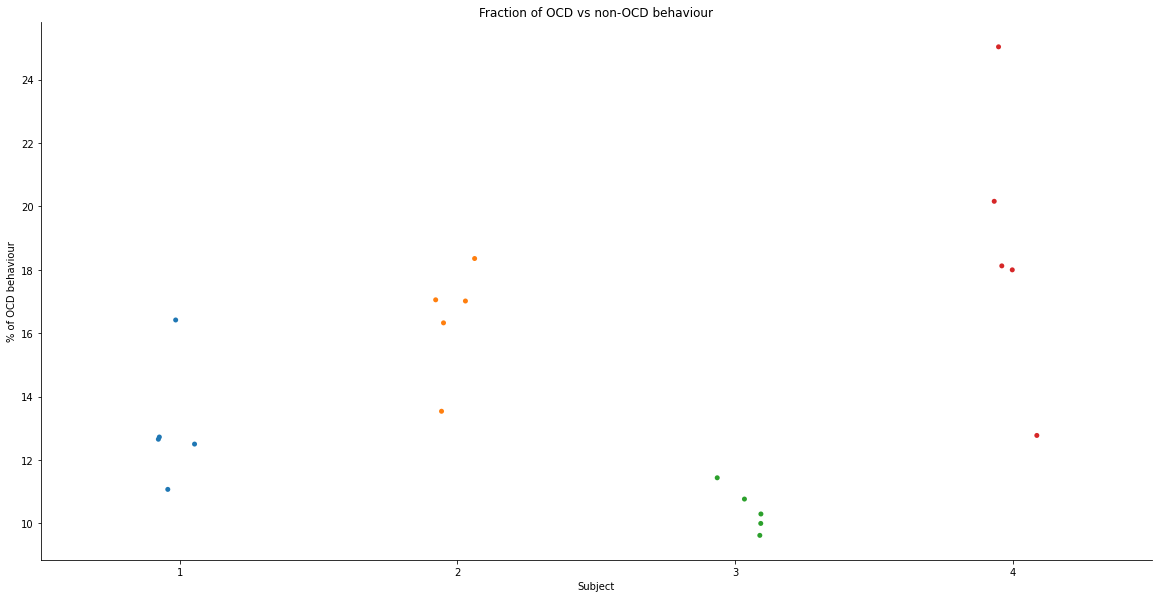

In [4]:
data = np.array([[run['ocd'].sum() / len(run) * 100 for run in adl] for adl in meta]).T
    
grid = sns.catplot(data=pd.DataFrame(data, columns=range(1, 5)), height=8, aspect=2)
grid.set(
    title='Fraction of OCD vs non-OCD behaviour',
    xlabel='Subject',
    ylabel='% of OCD behaviour'
)

plt.show()